17.1 A study was designed to compare Red Bull energy drink commercials. Each participant was shown the commercials, A and B, in random order and asked to select the better one. There were 140 women and 130 men who participated in the study. Commercial A was selected by 65 women and by 67 men. Find the odds of selecting Commercial A for the men. Do the same for the women.

In [1]:
import pandas as pd
import numpy as np
from math import exp, log, sqrt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from pandas import DataFrame
%matplotlib inline

Given:

m - #men

w - #women

mA - #men who choose Com. A

wA - #women who choose Com. A


In [9]:
m = 130
w = 140
mA = 67
wA = 65

In [11]:
prop_m = mA/m 
print('The proportoin of the men who chose Commercial A:', prop_m)

odds_m = (prop_m/(1-prop_m))
print('The estimated odds of the men who chose Commercial A:', odds_m)

prop_w = wA/w
print('The proportoin of the women who chose Commercial A:', prop_w)

odds_w = (prop_w/(1-prop_w))
print('The estimated odds of the women who chose Commercial A:', odds_w)


The proportoin of the men who chose Commercial A: 0.5153846153846153
The estimated odds of the men who chose Commercial A: 1.0634920634920633
The proportoin of the women who chose Commercial A: 0.4642857142857143
The estimated odds of the women who chose Commercial A: 0.8666666666666667


17.3 Log odds choosing Commercial A. Refer to Exercise 17.1. Find the log odds for the men and the log odds for the women choosing Commercial A.

We use statistical model for simple logistic regression:
 log(odds), to find  the log odds for the men and the log odds for the women choosing Commercial A

In [12]:
# for men
log_odds_m = np.log(odds_m)
log_odds_m

0.06155789299943316

In [14]:
# for women
log_odds_w = np.log(odds_w)
log_odds_w

-0.1431008436406733

17.5 Fitted model for energy drink commercials. Refer to Exercises 17.1 and 17.3. Find the estimates b0 and b1 and give the fitted logistic model. What is the
estimated odds ratio for a male to choose Commercial A (x=1) versus a female to choose Commercial A (x = 0)?

To find the estimates b0 and b1 and give the fitted logistic model we use these formulas:

log(p0/(1-p0))=B0

log(p1/(1-p1))=B0+B1

In [15]:
b0 = np.log(odds_w)
b0

-0.1431008436406733

In [17]:
b1 = log_odds_m - np.log(odds_w)
b1

0.20465873664010645

In [18]:
print("\nFitted logistic model: log(odds)=" , b0 , "+",  b1, "*x")
print("\nThe estimated odds ratio: ", exp(b1))


Fitted logistic model: log(odds)= -0.1431008436406733 + 0.20465873664010645 *x

The estimated odds ratio:  1.2271062271062267


17.7 . If we apply the exponential function to the fitted model in Example 17.6, we get odds = e^-1.41 + 781x = e^-1.41 * e^0.781x Show that for any value of the quantitative explanatory variable x, the odds ratio for increasing x by 1, odds(x+1)/oddsx is e^0.781 = 2.184. This justifies the interpretation given at the end of Example 17.6.


In [19]:
x = 1
odds_x = exp(-1.41)*exp(0.781*x)
odds_x_1 = exp(-1.41)*exp(0.781*(x+1))

print("Answer: ", odds_x_1/odds_x)





Answer:  2.1836548288635016


17.9 Inference for energy drink commercials. Use software to run a logistic regression analysis for the energy drink commercial data of Exercise 17.1. Summarize the results of the inference.

In [20]:
Data = {    
    'Male': [67, 63, 130],
    'Female': [65, 75, 140],
    'Total': [132, 138, 270]
}

df = DataFrame(Data, columns=['Male','Female', 'Total'])
df.head()

x = df[["Male"]]
y = df["Total"]
x = sm.add_constant(x)
lm = sm.OLS(y,x).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Total   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     118.2
Date:                Tue, 07 Apr 2020   Prob (F-statistic):             0.0584
Time:                        22:39:07   Log-Likelihood:                -9.5473
No. Observations:                   3   AIC:                             23.09
Df Residuals:                       1   BIC:                             21.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8780     17.476      0.050      0.9

C:\Users\Aser\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Aser\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  "samples were given." % int(n), ValueWarning)


17.11 Find the 95% confidence interval for the slope. Using the information in the output of Figure 17.6, find a 95% confidence interval for b1.

In [21]:
Z=1.96 # because from table confidence interval is 95%
print(3.109 - Z*0.388, 3.109+ Z*0.388)

2.3485199999999997 3.8694800000000003


17.13 X^2 or z. The Minitab output in Figure 17.6 does not give the value of X2. The column labeled “Z-Value” provides similar information.
(a) Find the value under the heading “Z-Value” for the predictor LCONC. Verify that this value is simply the estimated coefficient divided by its standard
error. This is a z statistic that has approximately the standard Normal distribution if the null hypothesis (slope 0) is true.
(b) Show that the square of z is X^2. The two-sided P-value for z is the same as P for X^2

a) to find Z-value:

In [22]:
coef = 3.109
SEcoef = 0.388
print(coef/SEcoef)

8.012886597938143


b) we use chi-square contingency test:

In [24]:
Chi_Square = 64.23
Z = np.sqrt(Chi_Square)
Z

8.014362108115655

17.15 What’s wrong? For each of the following,
explain what is wrong and why.

(a) If b1 = 2 in a logistic regression analysis, we estimate that the probability of an event is multiplied by 2 when the value of the explanatory variable changes by 1.

(b) The intercept b0 is equal to the odds of an event when     x = 0.

(c) The odds of an event are 1 minus the probability of the event.



Answer:

a) It is wrong, event is not multiplied by 2. The odds are increased by  e^2 or 7.3891 times, since the proportions go in the form of degrees e and the odds are the ratio of the proportions for the two possible outcomes.

b) It is true.The intercept b0 is equal to the log odds of an event when x=0 (formula log(p/(1-p))=b0+b1*x) 

c) It is wrong.The odds of an event are
the probability of the event divided by 1 minus the
probability of the event.The odds of an event are the probability of the event divided by 1 minus the probability of the event:  p/(1-p)

17.17 Converting odds to probability. Refer to the
previous exercise. For each opening-weekend revenue,
compute the estimated probability that the movie is
profitable.

Given:

a = $20 million dollars

b = $35 million dollars

c = $50 million dollars


In [28]:
a = np.log(20)
b = np.log(35)
c = np.log(50)
x = np.array([a, b, c])
b0 = -1.41
b1 = 0.781

p = 1 / (1 + np.exp(-b0-b1*x))
print(p)

[0.7170077  0.79685081 0.83825346]


17.19 Tipping behavior in Canada. The Consumer Report on Eating Share Trends (CREST) contains data that cover all provinces of Canada and that describe away-from-home food purchases by roughly 4000 households per quarter. Researchers recently restricted their attention to restaurants at which tips would normally be given.4 From a total of 73,822 observations, “high” and “low” tipping variables were created based on whether the observed tip rate was above 20% or below 10%, respectively. They then used logistic regression to identify explanatory variables
associated with either “high” or “low” tips. Here is a
table summarizing what they termed the stereotyperelated variables for the high-tip analysis: 
(Explanatory variable-Odds ratio)
Senior adult - 0.7420

Sunday - 0.9970

English as second language - 0.7360

French-speaking Canadian - 0.7840

Alcoholic drinks - 1.1250

Lone male - 1.0220

The starred odds ratios were significant at the 0.01
level. Write a short summary explaining these results
in terms of the odds of leaving a high tip.

Answer: 

    Senior adult are 0.742 times as likely to leave tips than younger man;
    
    People who drink alcohol are 1.12 times as likely to leave tips than the people who don't drink (odds of drinkers = 1.12 * odds od non-drinkers);
    
    People who speak English as second language 0.736 times as likely to leave tips than other people;
    
    French-speaking Canadians are 0.784 times as likely to leave tips than who doesn't speak French;

17.21 Interpret the results. Refer to the previous exercise. The researchers also reported odds ratios with 95% confidence intervals for this logistic regression
model.  
(a) Explain the relationship between the confidence
intervals reported here and the results of the z
significance tests that you found in the previous exercise.
(b) Interpret the results in terms of the odds ratios.
(c) Write a short summary explaining the results.
Include comments regarding the usefulness of the fitted
coefficients versus the odds ratios in making a summary.

a) An odds ratio of 1 indicates that the condition or event under study is equally likely to occur in both groups. Hence, if confidence interval includes 1, we can say that the variable is not significant

b) Since only "Men's magazines" variable's confidence interval contains 1, we can say that this variable is not significant at 0.05 level and other are significant

c) Mature readers are 1.27 to 2.16 times as likely to observe not sexual clothing on model as young readers Male model's clothing is 2.74 to 5.01 times as likely than female model's clothing to be not sexual. When target auditory is women, the model clothing is 1.11 to 2.23 times as likely to be not sexual as in other journals. The odds ratios are often much easier to interpret than the fitted coefficients because we can interpret them as ratio of likeliness.

17.23 E-government use in Canada. Electronic government (e-government) provides digital means, such as an email address or a website, for citizens to contact public officials. The vision behind e-government is to create a more citizen-focused government. One study used survey data to determine what factors are
related to a citizen using an e-government website rather than visiting or calling a government office.7 The dependent variable refers to whether the citizen used the website or not. Explanatory variables include sex (1 = female, 0 = male), daily Internet use (1 = yes, 0 = no), age (six ordered categories
numbered 1 through 6), household income (seven ordered categories numbered 1 through 7), size of the community (six ordered categories numbered 1 through 6), and education (1 = at least some postsecondary education, 0 = other). The following table summarizes the results. 
All but “Education” and “Income” were significant at
the 0.05 level.

(a) Interpret each of the odds ratios in terms of the
probability that the individual uses the website.

(b) Compute the regression coefficients for each of the
variables in the table.

(c) What are the odds that a male college graduate, who
uses the Internet daily, is age category 3, household income
level 4, and community size 5 is using the Internet?

a)
By analizing the table of explanatory variable and odds ratio we can say that female are 0.87 times as likely to use the website than male. The people who use the Internet daily 4.16 times as likely to use the site than who don't use
Old people are 0.81 times as likely to visit the website as people from younger generation. People from larger community 0.85 times as likely to use the website as peop;e from smaller community. Other odds ratios are not significant

In [29]:
# b)
sex = np.log(0.87)
daily_internet_usage= np.log(4.16)
age = np.log(0.81)
income = np.log(1.01)
size = np.log(0.85)
education = np.log(0.97)
intercept = np.log(0.66)

print ("sex: ", sex)
print ("daily internet usage: ", daily_internet_usage)
print ("age: ", age)
print ("income: ", income)
print ("size: ", size)
print ("education: ", education)
print ("intercept: ", intercept)


sex:  -0.13926206733350766
daily internet usage:  1.425515074273172
age:  -0.21072103131565253
income:  0.009950330853168092
size:  -0.16251892949777494
education:  -0.030459207484708574
intercept:  -0.4155154439616658


In [30]:
# c)

odds = np.exp(sex*0 +  daily_internet_usage + age*3 + income*4 + size*5 + education + intercept)
print('odds = {}'.format(odds))

odds = 0.6534978765999487


17.25 Stock options. Different kinds of companies compensate their key employees in different ways. Established companies 
may pay higher salaries, while new companies may offer stock options that will be valuable if the company succeeds. 
Do high-tech companies tend to offer stock options more often than other companies? One study looked at a random sample of
200 companies. Of these, 91 were listed in the Directory of Public High Technology Corporations, and 109 were not listed. 
Treat these two groups as SRSs of high-tech and non-high-tech companies.  Seventy-three of the high-tech companies and 75 of
the non-high-tech companies offered incentive stock options to key employees.

(a) What proportion of the high-tech companies offer stock options to their key employees? What are the odds?

(b) What proportion of the non-high-tech companies offer stock options to their key employees? What are the odds?

(c) Find the odds ratio using the odds for the high-tech companies in the numerator. Interpret the result in a few sentences

In [31]:
# a)
listed = 91 
notListed = 109 
highTech = 73 
notHighTech = 75 
proportion1 = highTech / listed
odds1 = proportion1 / (1 - proportion1)
print(proportion1, odds1)

0.8021978021978022 4.055555555555556


In [33]:
# b)
proportion2 = notHighTech / notListed
odds2 = proportion2 / (1 - proportion2)
print(proportion2, odds2)

0.6880733944954128 2.205882352941176


In [34]:
# c)
odds_ratio = odds1 / odds2
print(odds_ratio)

1.838518518518519


17.27 Do the inference. Refer to the previous exercise.
Software gives 0.3347 for the standard error of b1.

(a) Find the 95% confidence interval for beta1.

(b) Transform your interval in (a) to a 95% confidence
interval for the odds ratio.

(c) What do you conclude?

 Formula: log_odds = b0 + b1*0 = log_odds_non-high-tech

In [50]:
# a)
log_odds1 = np.log(odds1)
log_odds2 = np.log(odds2)
b0 = log_odds2 
b1 = log_odds1 - b0
se = 0.3347
z = 1.96 
l_b = b1 - se*z
u_b = b1 + se*z
print('[{}, {}]'.format(l_b, u_b))

[-0.04705190566792217, 1.2649720943320777]


In [51]:
# b)
print('[{}, {}'.format(np.exp(l_b), np.exp(u_b)))

[0.9540378763319712, 3.542993865119207


Part C : c) My conclusion is that confidence interval of odds ratio includes 1, there is no significant effect in proportions of different types of companies

17.29 Poor service. In the food service industry, some argue tipping encourages servers to provide  discriminate service.
If the server expects a good tip, he or she may provide better service. In one survey, 193 servers were surveyed and asked 
if they ever provided poor service because they did not expect a good tip. Ninety-six replied yes

(a) What proportion of the servers have provided poor service because of an expected bad tip?

(b) What are the odds that a server will have provided bad service given an expected bad tip?

(c) What proportion of the servers did not provide bad service?

(d) What are the odds that a server will not have provided bad service ?

(e) How are your answers to parts (b) and (d) related?

In [36]:
# Given:
a = 193
b = 96


In [35]:
# a)
p = a / b
print(p)


0.8425988740745154


In [37]:
# b)
print('odds:', p / (1 - p))


odds: 5.3531947063289165


In [38]:
# c)
p1 = (a - b) / a
print(p1)


0.5025906735751295


In [39]:
# d)
print('odds:', p1 / (1 - p1))

odds: 1.0104166666666667


e) They are opposite to each other

17.31 Analysis of a reduction in force. To meet competition or cope with economic slowdowns, corporations sometimes undertake a “reduction in force” (RIF), in which substantial numbers of employees are terminated. Federal and various state laws require that employees be treated equally regardless of their age. In particular, employees over the age of 40 years are in a “protected” class, and many allegations of discrimination focus on comparing employees over 40 with their younger coworkers. Here are the data for a recent RIF: 

(a) Write the logistic regression model for this problem using the log odds of a termination as the response variable and an indicator for over and under 40 years of age as the explanatory variable.

(b) Explain the assumption concerning binomial distributions in terms of the variables in this exercise. To what extent do you think that these assumptions are reasonable?

(c) Software gives the estimated slope b1 5 1.0371 and its standard error SEb1 5 0.2755. Transform the results to the odds scale. Summarize the results and write a short conclusion.

(d) If additional explanatory variables were available, for example, a performance evaluation, how would you use this information to study the RIF?

In [40]:
# a)
proportion1 = 17 / 581 
log_odds1 = np.log(proportion1 / (1 - proportion1))
proportion2 = 71 / 906 
log_odds2 = np.log(proportion2 / (1 - proportion2))
b0 = log_odds1 
b1 = log_odds2 - b0
print('b1 = {}, b0 = {}'.format(b1, b0))

b1 = 1.037089059632303, b0 = -3.501840907441843


In [41]:
# c)
se = 0.2755
z = 1.96
print(f'[{np.exp(b1 - z*se)}, {np.exp(b1 + z*se)}]')

[1.643961798813072, 4.84074705794278]


d)If additional explanatory variables were avaolable, confidence interval doesn't contain 1, we can say that the variable is significant at 0.05 level

17.33 Know your customers. To devise effective marketing strategies, it is helpful to know the characteristics of your customers. A study compared demographic characteristics of people who use the Internet for travel arrangements and of people who do not.12 Of 1132 Internet users, 643 had completed college. Among the 852 nonusers, 349 had completed college. Model the log odds of using the Internet to make travel arrangements with an indicator variable for having completed college as the explanatory variable. Summarize your findings.

In [42]:
proportion1 = 643 / (643 + 349) 
log_odds1 = np.log(proportion1 / (1 - proportion1))
proportion2 = (1132 - 643) / (1132 - 643 + 852 - 349) 
log_odds2 = np.log(proportion2 / (1 - proportion2))
b0 = log_odds2 
b1 = log_odds1 - b0
print('b1 = {}, b0 = {}'.format(b1, b0))
np.exp(b1)

b1 = 0.6393004826600597, b0 = -0.02822768062486732


1.8951547219341272

Conclusion: The result is 1.8952. It means that, those who have completed college are 1.8952 times more likely to use the Internet for travel arrangements than those who have not completed college.

17.39 Is there a trend? Refer to the previous exercise. The coding of the indicator variables suggests a way to code models when you expect a pattern in the response that is based on some kind of ordering of the explanatory variable. In some settings this is called detecting a dose response.

(a) Use the model to give the estimated log odds for each NCAA division.

(b) Plot these estimates versus division and summarize the results. Does there appear to be a pattern in the results?

(c) How would you model the pattern that you described in part (b)?

In [43]:
# a)
division = np.array([.172, .21, .244])
result = np.log(division / (1 - division))
result


array([-1.57151868, -1.32492541, -1.13087315])

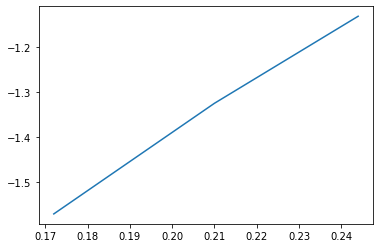

In [44]:
plt.plot(division, result)
plt.show()

Part B: This graph shows that odds of gambling increases as the division increases.

Part C:  We ccan use a regression analysis, because the relationship is quite linear,